# 4


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn import preprocessing
df = pd.read_csv("../data/soccer.csv")
X = df.drop("target", axis=1)
y = df[["target"]]


X_train, y_train = X.iloc[:2560], y.iloc[:2560]
X_test, y_test = X.iloc[2560:], y.iloc[2560:]


print("Samples of X_train dataset", X_train.shape[0])
print("Samples of X_test dataset", X_test.shape[0])
print("Samples of y_train dataset", y_train.shape[0])
print("Samples of y_test dataset", y_test.shape[0])

print('X_train:')
display(X_train.head())
print('y_train:')
display(y_train.head())
print('X_test:')
display(X_test.head())
print('y_test:')
display(y_test.head())

Samples of X_train dataset 2560
Samples of X_test dataset 640
Samples of y_train dataset 2560
Samples of y_test dataset 640
X_train:


,home_team,away_team,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_1
0,Barbados,Cuba,-21.0,2.0,2.0,1.0,1.0,0.037037,-92.0,-92.0,0.018519,0.018519,1
1,Barbados,Cuba,-21.0,1.0,1.0,0.5,0.5,0.008511,-35.5,-35.5,0.008897,0.008897,1
2,Mongolia,Guam,-4.0,4.0,4.0,-1.0,-1.0,0.021622,0.0,0.0,0.016216,0.016216,0
3,Nepal,Bhutan,-22.0,1.0,1.0,0.0,0.0,0.004975,7.0,7.0,0.000000,0.000000,0
4,Bangladesh,Pakistan,-7.0,-1.0,-1.0,-0.5,-0.5,-0.007200,30.5,30.5,-0.010437,-0.010437,0


y_train:


,target
0,1
1,1
2,1
3,0
4,0


X_test:


,home_team,away_team,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_1
2560,Morocco,Comoros,-104.0,0.781250,0.2,-0.912202,-0.4,0.013097,-30.389881,-68.6,0.025636,0.030096,0
2561,Gabon,Ghana,37.0,-0.090686,0.2,0.443627,0.2,-0.003208,15.752451,15.6,-0.002582,-0.004016,0
2562,South Korea,Iceland,-29.0,0.647619,0.2,-1.080952,-0.6,0.004299,17.052381,-26.0,0.015580,0.026649,1
2563,Nigeria,Sudan,-89.0,0.401434,1.0,-0.573477,-1.6,0.007106,-21.334528,18.0,0.027568,0.022632,0
2564,Guinea-Bissau,Egypt,61.0,-0.770690,-0.8,0.998276,0.8,-0.007272,-7.724138,30.8,-0.013644,-0.011007,0


y_test:


,target
2560,0
2561,1
2562,0
2563,0
2564,1


In [12]:
X_train = X_train.drop(["home_team", "away_team"], axis=1)
X_test = X_test.drop(["home_team", "away_team"], axis=1)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

display(pd.DataFrame(X_train).head())
display(pd.DataFrame(X_test).head())

,0,1,2,3,4,5,6,7,8,9,10
0,-0.248218,2.245957,1.710918,1.089978,0.869097,1.193660,-2.697098,-2.504762,0.221283,0.178124,1.741119
1,-0.248218,1.101890,0.831728,0.570203,0.452160,0.236789,-0.972943,-0.919497,0.065923,0.061954,1.741119
2,0.042702,4.534091,3.469298,-0.989123,-0.798652,0.676576,0.110376,0.076554,0.184109,0.150327,-0.574343
3,-0.265331,1.101890,0.831728,0.050427,0.035223,0.118196,0.323989,0.272959,-0.077729,-0.045460,-0.574343
4,-0.008637,-1.186244,-0.926653,-0.469348,-0.381715,-0.290212,1.041115,0.932317,-0.246249,-0.171470,-0.574343


,0,1,2,3,4,5,6,7,8,9,10
0,-1.668593,0.851625,0.128376,-0.897853,-0.298327,0.390641,-0.817002,-1.848209,0.336212,0.317906,-0.574343
1,0.744333,-0.145928,0.128376,0.511601,0.201997,-0.156290,0.591079,0.514256,-0.119424,-0.093950,-0.574343
2,-0.385122,0.698742,0.128376,-1.073277,-0.465102,0.095526,0.630747,-0.652948,0.173840,0.276288,1.741119
3,-1.411899,0.417090,0.831728,-0.545731,-1.298977,0.189661,-0.540669,0.581594,0.367399,0.227793,-0.574343
4,1.155044,-0.923898,-0.750815,1.088186,0.702322,-0.292604,-0.125334,0.940734,-0.298027,-0.178358,-0.574343


## b

In [13]:
models_to_test = [LDA, QDA, LR, NB, kNN]
results_dict = {}
for model_type in models_to_test:
    model_name = model_type.__name__
    params = {}
    if model_type in [LDA,QDA]:
        params.update({'store_covariance': True})
    results_dict[model_name] = {}
    cls = model_type(**params)
    cls.fit(X_train,y_train.values.ravel())
    

    # save model for later analysis
    results_dict[model_name]['in_sample_predictions'] = cls.predict(X_train)
    results_dict[model_name]['test_predictions'] = cls.predict(X_test)
    results_dict[model_name]['model'] = cls
    

    # train model with no ravel for the sake of comparison
    cls2 = model_type(**params)
    cls2.fit(X_train,y_train)
    results_dict[model_name]['in_sample_predictions_no_ravel'] = cls2.predict(X_train)
    results_dict[model_name]['test_predictions_no_ravel'] = cls2.predict(X_test)
    results_dict[model_name]['model_no_ravel'] = cls2

c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\miniconda3\envs\ml_impa\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [14]:
# Check if predictions are the same for both ravel and no ravel models
for model in models_to_test:
    print(model.__name__)
    print("In-sample:", (results_dict[model.__name__]['in_sample_predictions'] == results_dict[model.__name__]['in_sample_predictions_no_ravel']).all())
    print("Test predictions:", (results_dict[model.__name__]['test_predictions'] == results_dict[model.__name__]['test_predictions_no_ravel']).all())
    print('\n')

LinearDiscriminantAnalysis
In-sample: True
Test predictions: True


QuadraticDiscriminantAnalysis
In-sample: True
Test predictions: True


LogisticRegression
In-sample: True
Test predictions: True


GaussianNB
In-sample: True
Test predictions: True


KNeighborsClassifier
In-sample: True
Test predictions: True




In [15]:
# Check the coefficients of all models
for model_name in models_to_test:
    print(model_name.__name__)
    print('\n')
    model = results_dict[model_name.__name__]['model']
    
    features = ['coef_', 'intercept_', 'theta_', 'var_', 'covariance_', 'means_']
    for feature in features:
        if hasattr(model, feature):
            print(f"- {feature}:", getattr(model, feature), '\n')
    print('\n', '-'*100, '\n')

# What is the covariance matrix learned by LDA and QDA?
# What model NBGaussian corresponds to?

LinearDiscriminantAnalysis


- coef_: [[ 0.81020182 -0.25509109 -0.02597723  0.01737212  0.23328399  0.06932802
   0.36582449 -0.04958442 -0.08327417  0.04290928  0.04662934]] 

- intercept_: [0.10899716] 

- covariance_: [[ 0.77998276 -0.29321423 -0.28988186  0.33921409  0.32965147 -0.27400118
   0.43809293  0.27007243 -0.31062814 -0.21450372 -0.07323   ]
 [-0.29321423  0.93006391  0.73517881 -0.39009735 -0.32195095  0.45802684
   0.09493708  0.11345468  0.31304343  0.23520374  0.04208835]
 [-0.28988186  0.73517881  0.93334199 -0.31368572 -0.33014768  0.37419603
   0.02412058  0.24146858  0.24982019  0.20443947  0.04177604]
 [ 0.33921409 -0.39009735 -0.31368572  0.91932382  0.77769448 -0.12942208
  -0.03239098 -0.05951943 -0.17720866 -0.14784585 -0.04960233]
 [ 0.32965147 -0.32195095 -0.33014768  0.77769448  0.91175206 -0.11925099
   0.01165817 -0.1587498  -0.16609566 -0.14825051 -0.02481927]
 [-0.27400118  0.45802684  0.37419603 -0.12942208 -0.11925099  0.95275676
  -0.28011282 -0.20

Confusion Matrix for LinearDiscriminantAnalysis:


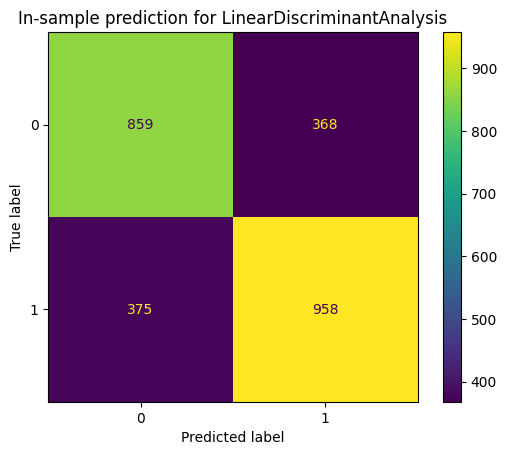

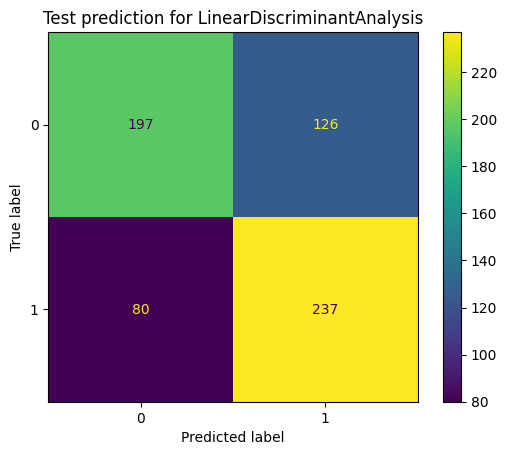


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for QuadraticDiscriminantAnalysis:


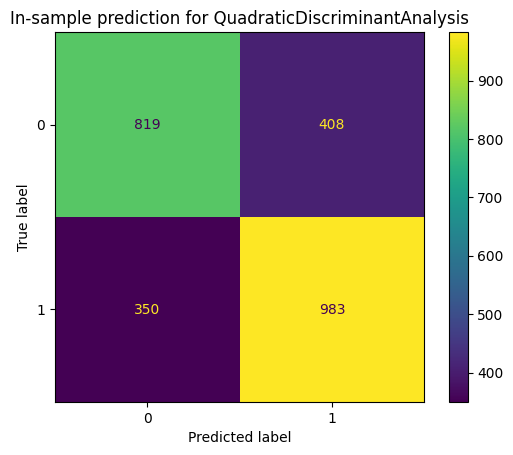

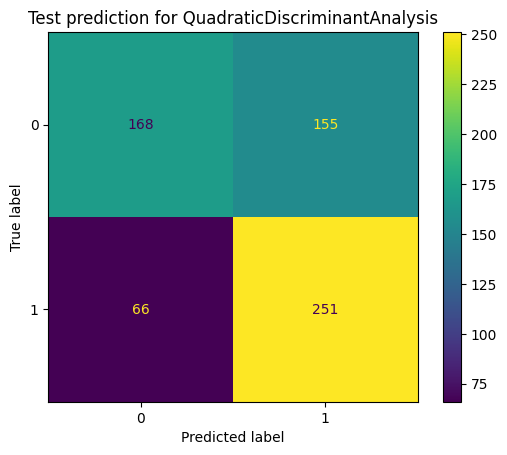


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for LogisticRegression:


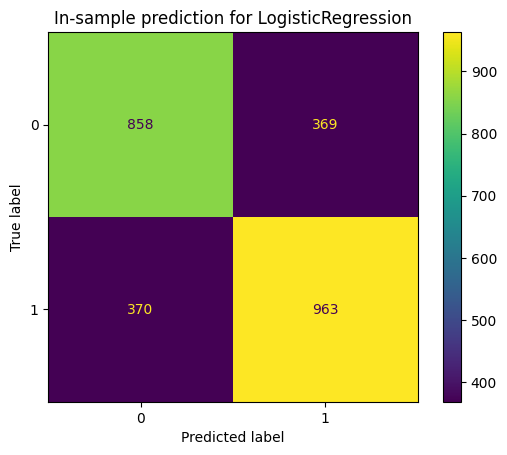

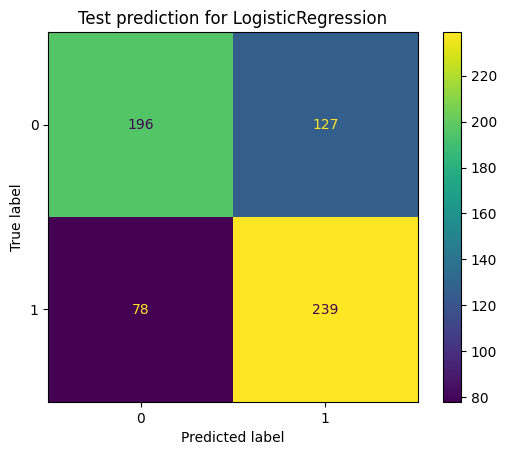


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for GaussianNB:


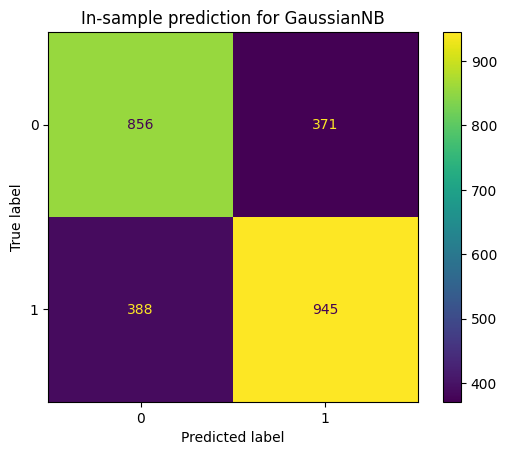

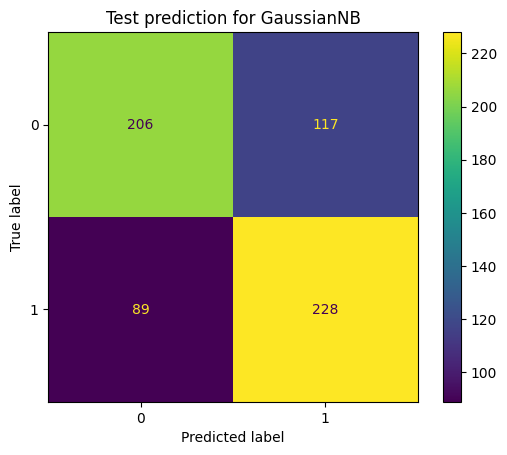


 ---------------------------------------------------------------------------------------------------- 

Confusion Matrix for KNeighborsClassifier:


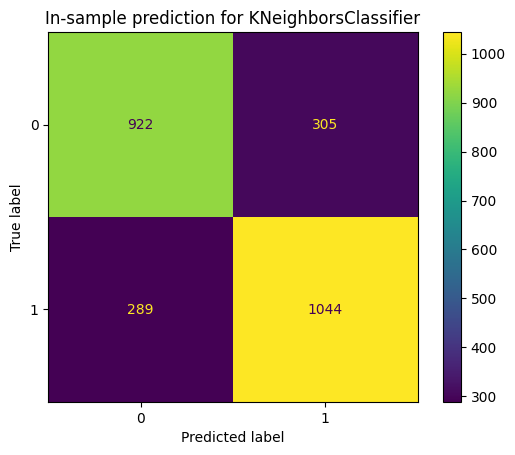

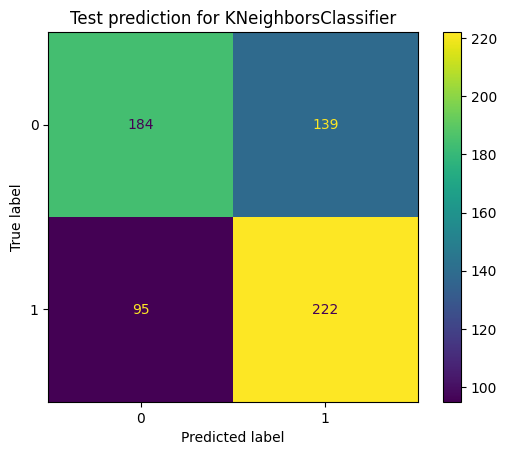


 ---------------------------------------------------------------------------------------------------- 



In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
for model_name in models_to_test:
    model_type_name = model_name.__name__
    in_sample_predictions = results_dict[model_type_name]['in_sample_predictions']
    test_predictions = results_dict[model_type_name]['test_predictions']
    print(f"Confusion Matrix for {model_type_name}:")
    ConfusionMatrixDisplay.from_predictions(y_train, in_sample_predictions)
    plt.title('In-sample prediction for '+ model_type_name)
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
    plt.title('Test prediction for '+ model_type_name)
    plt.show()
    print('\n', '-'*100, '\n')

## c


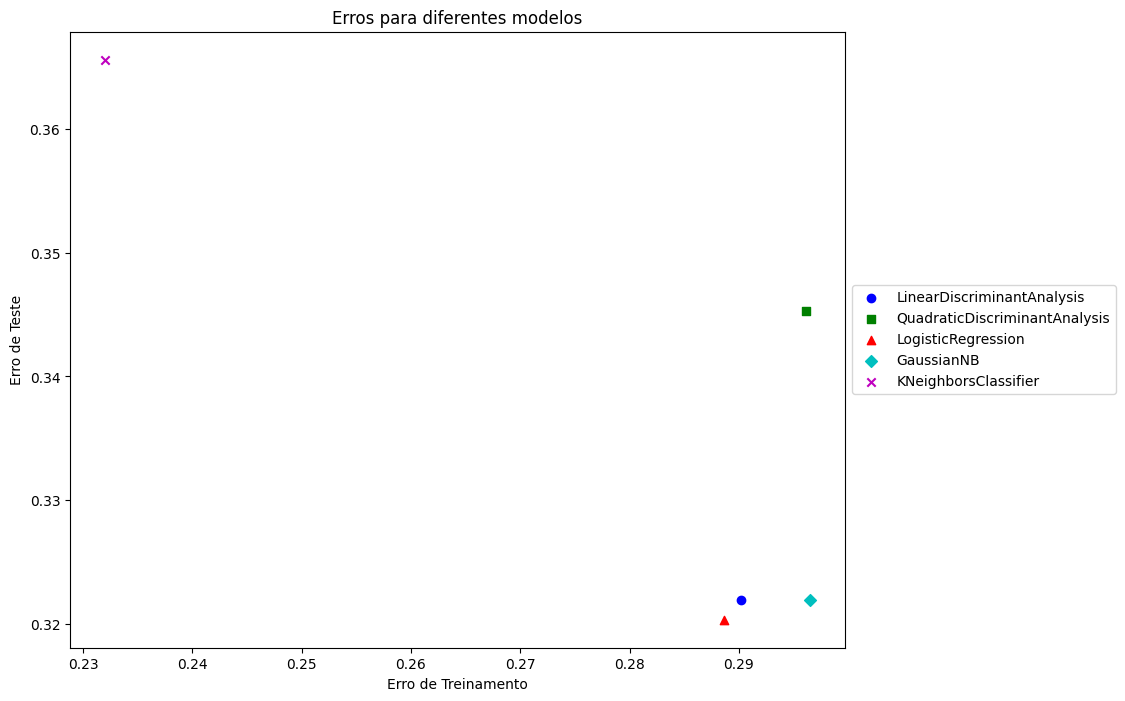

In [17]:
plot_markers = ['o', 's', '^', 'D', 'x']
plot_colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(10,8))
i = 0

for model_name in models_to_test:
    model_type_name = model_name.__name__
    in_sample_predictions = results_dict[model_type_name]['in_sample_predictions']
    test_predictions = results_dict[model_type_name]['test_predictions']
    train_error = np.mean(in_sample_predictions != y_train.values.ravel())
    test_error = np.mean(test_predictions != y_test.values.ravel())
    plt.scatter(train_error, test_error, label= model_type_name, color=plot_colors[i], marker=plot_markers[i])
    i += 1

plt.title(f'Erros para diferentes modelos')
plt.xlabel('Erro de Treinamento')
plt.ylabel('Erro de Teste')
#move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### d

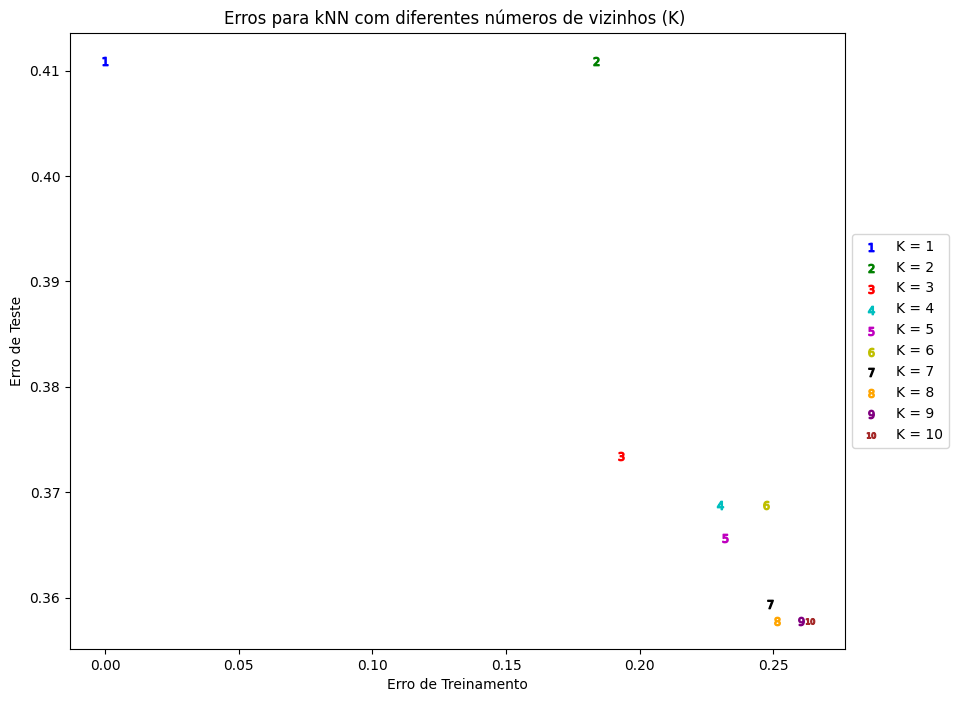

In [18]:
# use numbers as markers for kNN from 1 to 10
plot_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']

plt.figure(figsize=(10,8))
for k in range(1,11):
    model = kNN(n_neighbors=k)
    model.fit(X_train,y_train.values.ravel())
    in_sample_predictions_k = model.predict(X_train)
    test_predictions_k = model.predict(X_test)
    train_error = np.mean(in_sample_predictions_k != y_train.values.ravel())
    test_error = np.mean(test_predictions_k != y_test.values.ravel())
    plt.scatter(train_error, test_error, label= f'K = {k}', color=plot_colors[k-1], marker=f'${k}$')


plt.title(f'Erros para kNN com diferentes números de vizinhos (K) ')
plt.xlabel('Erro de Treinamento')
plt.ylabel('Erro de Teste')
#move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
